# Task:
*   Develop models that can be used to predict the price of used cars based on various attributes.
*   Recommend a model that outperforms other machine learning models with respect to MSE and R2-score.





## Data Dictionary

1. `Symboling` : Its assigned insurance risk rating, A value of +3 indicates that the auto is least risky, while -3 has the highest risk level associated with a particular car model.
2. `normalized-losses` : Normalized losses refer to the average loss payment per insured vehicle
3. `make` : Name of car company
4. `fuel-type` : Car fuel type
5. `aspiration` : Aspiration used in the car
6. `num-of-doors` : Number of doors in a car
7. `body-style` : Shape and layout of the car's exterior of the car
8. `drive-wheels` : Type of drive wheel
9. `engine-location` : Location of the car engine
10. `wheel-base` : Weelbase of the car
11. `length` : Length of the car
12. `width` : Width of the car
13. `height` : Height of the car
14. `curb-weight` : The weight of a car without occupants or baggage
15. `engine-type` : Type of engine
16. `num-of-cylinders` : Cylinders placed in the car
17. `engine-size` : Size of the car engine
18. `fuel-system` : Fuel system of the car
19. `bore` : Boreratio of the car
20. `stroke` : Stroke length of the engine the distance that the piston travels inside the engine cylinder.
21. `compression-ratio` : Compression ratio of car
22. `horsepower` : Horsepower of the car
23. `peak-rpm` : The peak revolutions per minute of an engine of the car
24. `city-mpg` : Car's mileage in the city
25. `highway-mpg` : Car's mileage on highway
26. `price` : Price of the car

## Process
1. Load the dataset
2. Data Cleaning
3. EDA (Exploratory Data Analysis)
4. Data preprocessing pipelines
5. Machine learning techniques
6. Conclusion


### Importing all the libraries

In [70]:
# Import all the Required libraries

# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model Building
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Load the dataset

In [71]:
df = pd.read_csv("cars_price.csv")

In [72]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0000,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,NaN,2548.0000,dohc,NaN,NaN,mpfi,3.47,2.68,9.0000,111,NaN,21.0000,27.0000,13495
1,3.0000,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548.0000,NaN,four,130.0000,mpfi,3.47,2.68,9.0000,111,NaN,21.0000,27.0000,16500
2,1.0000,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5000,171.2000,65.5000,52.4000,2823.0000,ohcv,six,152.0000,mpfi,NaN,3.47,9.0000,154,NaN,19.0000,26.0000,16500
3,2.0000,164,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337.0000,ohc,four,109.0000,mpfi,3.19,NaN,10.0000,102,5500,24.0000,30.0000,13950
4,2.0000,164,audi,gas,std,NaN,sedan,4wd,front,99.4000,NaN,NaN,54.3000,2824.0000,NaN,five,136.0000,mpfi,NaN,3.4,8.0000,115,5500,18.0000,22.0000,17450
5,2.0000,?,audi,gas,std,two,sedan,NaN,front,99.8000,177.3000,66.3000,53.1000,2507.0000,ohc,NaN,136.0000,mpfi,3.19,3.4,8.5000,110,5500,19.0000,NaN,15250
6,1.0000,158,audi,gas,NaN,four,NaN,fwd,front,105.8000,192.7000,71.4000,55.7000,2844.0000,ohc,five,136.0000,mpfi,3.19,3.4,8.5000,NaN,5500,NaN,25.0000,17710
7,1.0000,?,audi,gas,std,four,wagon,fwd,front,NaN,192.7000,71.4000,55.7000,2954.0000,ohc,five,136.0000,NaN,3.19,3.4,8.5000,110,NaN,19.0000,25.0000,18920
8,1.0000,158,NaN,gas,turbo,four,sedan,NaN,front,105.8000,192.7000,71.4000,55.9000,3086.0000,NaN,five,131.0000,mpfi,3.13,3.4,8.3000,140,5500,17.0000,20.0000,23875
9,NaN,?,NaN,gas,turbo,two,hatchback,NaN,front,99.5000,178.2000,67.9000,52.0000,3053.0000,ohc,five,131.0000,mpfi,3.13,3.4,7.0000,160,5500,16.0000,22.0000,?


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

#### Observation

1. Following coloumns have the wrong dtype and should be converted from object to float.
*   normalized losses
*   bore
*   stroke
*   horsepower
*   peak-rpm
*   price


2. A lot of missing values in the data

3. Possible duplicates

4. Unknown values in the data such as '?'

5. Num of doors, and Num of Cylinder should be numerical values. For example, 3 instead of 'three'.


We proceed with data cleaning to handle all the missing values and wrong entries.






### 2. Data Cleaning

In [74]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.0000,27264.0000,27258.0000,27387.0000,27281.0000,27302.0000,27271.0000,27327.0000,27229.0000,27303.0000
mean,0.8391,98.8079,174.1583,65.9181,53.7321,2560.2660,127.3228,10.1282,25.1585,30.7099
std,1.2396,6.0378,12.3662,2.1437,2.4385,522.4835,41.8633,3.9436,6.5173,6.8626
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,7.0000,13.0000,16.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,8.5000,19.0000,25.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,9.0000,24.0000,30.0000
75%,2.0000,102.4000,183.5000,66.9000,55.5000,2954.0000,146.0000,9.4000,30.0000,34.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,23.0000,49.0000,54.0000


In [75]:
df.describe(include = object)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,27294,27228,27309,27355,27321,27326,27215,27352,27285,27298,27249,27373,27409,27182,27331,27287
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,5526,4229,24671,22383,15292,12776,15777,26990,19569,21056,12506,3120,2681,2540,4902,563


#### 2.1. Removing duplicates

In [76]:
## Checking duplicates

df.duplicated().any() #Boolean value of 'True' indicates there are exact duplicates

True

In [77]:
## How many duplicates?

df.duplicated().sum()

4456

In [78]:
## Remove duplicates

df.drop_duplicates(inplace = True)

In [79]:
df.shape


(25874, 26)

Before we correct the dtypes, we first need to replace unknown values such as '?', otherwise conversion will not be possible. Also, we need to look if there are any other unknown values in the dataset.


#### 2.2. Replacing unknown values

In [80]:
## Finding all the unknown values in categorical features

for col in df.select_dtypes(exclude= np.number).columns:
  unique_val = df[col].unique()
  print(f"Unique values in '{col}':")
  print(unique_val)
  print("-" * 50)

Unique values in 'normalized-losses':
[nan '?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '161' '153' '125' '128' '103' '122' '108' '194' '231' '119' '154' '74'
 '186' '83' '102' '89' '87' '77' '91' '168' '134' '65' '197' '90' '94'
 '256' '95' '142']
--------------------------------------------------
Unique values in 'make':
['alfa-romero' 'audi' nan 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
--------------------------------------------------
Unique values in 'fuel-type':
['gas' nan 'diesel']
--------------------------------------------------
Unique values in 'aspiration':
['std' nan 'turbo']
--------------------------------------------------
Unique values in 'num-of-doors':
['two' 'four' nan '?']
-----------------------------------------------

In [81]:
## Finding all the unknown values in numerical features

for col in df.select_dtypes(include=np.number).columns:
  unique_vals = df[col].unique()
  print(f"Unique value in '{col}' is:")
  print(unique_vals)
  print("-" * 50)

Unique value in 'symboling' is:
[ 3.  1.  2. nan  0. -1. -2.]
--------------------------------------------------
Unique value in 'wheel-base' is:
[ 88.6  94.5  99.8  99.4 105.8   nan  99.5 101.2 103.5 110.   88.4  93.7
 103.3  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9
 106.7 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3
  99.2 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7
 102.4 102.9 104.5  97.3 104.3 109.1]
--------------------------------------------------
Unique value in 'length' is:
[168.8 171.2 176.6   nan 177.3 192.7 178.2 176.8 189.  197.  141.1 155.9
 157.3 174.6 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7 172.6 199.6
 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 208.1 199.2 178.4
 173.  173.2 172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6 186.7 198.9
 167.3 168.9 175.7 181.5 186.6 157.9 172.  173.5 173.6 158.7 169.7 166.3
 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7 180.2 183.1 188.8 178.5
 158.8

'?' is the only unknown value present in the dataset, hence we replace it with NaN.

In [82]:
## Replacing '?' with NaN

df.replace("?", np.nan, inplace=True)

In [83]:
## Checking count of ? in the dataset

unknown_value = df == "?"
columnwise_results = unknown_value.sum()
columnwise_results

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [84]:
## Checking the count of null values

df.isnull().sum()

,0
symboling,2913
normalized-losses,7581
make,2969
fuel-type,2892
aspiration,2843
num-of-doors,3123
body-style,2875
drive-wheels,2990
engine-location,2850
wheel-base,2944


#### 2.3. Converting dtype from object to float





In [85]:
## Converting dtypes of 6 columns

columns_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[columns_to_convert] = df[columns_to_convert].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25874 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          22961 non-null  float64
 1   normalized-losses  18293 non-null  float64
 2   make               22905 non-null  object 
 3   fuel-type          22982 non-null  object 
 4   aspiration         23031 non-null  object 
 5   num-of-doors       22751 non-null  object 
 6   body-style         22999 non-null  object 
 7   drive-wheels       22884 non-null  object 
 8   engine-location    23024 non-null  object 
 9   wheel-base         22930 non-null  float64
 10  length             22921 non-null  float64
 11  width              23054 non-null  float64
 12  height             22934 non-null  float64
 13  curb-weight        22977 non-null  float64
 14  engine-type        22962 non-null  object 
 15  num-of-cylinders   22953 non-null  object 
 16  engine-size        22944 no

#### 2.4. Converting No. of cylinders to numerical values

In [86]:
## No. of cylinders should be numerical values

mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['num-of-cylinders'] = df['num-of-cylinders'].replace(mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25874 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          22961 non-null  float64
 1   normalized-losses  18293 non-null  float64
 2   make               22905 non-null  object 
 3   fuel-type          22982 non-null  object 
 4   aspiration         23031 non-null  object 
 5   num-of-doors       22751 non-null  object 
 6   body-style         22999 non-null  object 
 7   drive-wheels       22884 non-null  object 
 8   engine-location    23024 non-null  object 
 9   wheel-base         22930 non-null  float64
 10  length             22921 non-null  float64
 11  width              23054 non-null  float64
 12  height             22934 non-null  float64
 13  curb-weight        22977 non-null  float64
 14  engine-type        22962 non-null  object 
 15  num-of-cylinders   22953 non-null  float64
 16  engine-size        22944 no

The only preprecessing left is the missing values that require imputations. Imputations will be performed through datapreprocessing pipelines.

### 3. EDA (Exploratory Data Analysis)

In [87]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,22961.0000,18293.0000,22930.0000,22921.0000,23054.0000,22934.0000,22977.0000,22953.0000,22944.0000,22592.0000,22622.0000,23007.0000,22628.0000,22791.0000,22916.0000,22972.0000,22479.0000
mean,0.8425,122.3996,98.8123,174.1683,65.9201,53.7330,2560.2213,4.3890,127.3224,3.3303,3.2575,10.1220,104.7249,5122.3641,25.1485,30.7002,13236.8269
std,1.2441,35.4832,6.0445,12.3840,2.1484,2.4359,521.6247,1.0816,41.8179,0.2724,0.3165,3.9420,39.7417,478.5450,6.5366,6.8834,7945.6764
min,-2.0000,65.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,2.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,4.0000,97.0000,3.1500,3.1100,8.5000,70.0000,4800.0000,19.0000,25.0000,7775.0000
50%,1.0000,115.0000,97.0000,173.2000,65.5000,54.1000,2420.0000,4.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10345.0000
75%,2.0000,150.0000,102.4000,183.5000,66.9000,55.5000,2954.0000,4.0000,146.0000,3.5900,3.4100,9.4000,120.0000,5500.0000,30.0000,34.0000,16500.0000
max,3.0000,256.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,12.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [88]:
df.describe(include = object)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system
count,22905,22982,23031,22751,22999,22884,23024,22962,22930
unique,22,2,2,2,5,3,2,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,mpfi
freq,3568,20773,18807,12819,10738,13272,22722,16472,10560


#### 3.1. Univariate Analysis

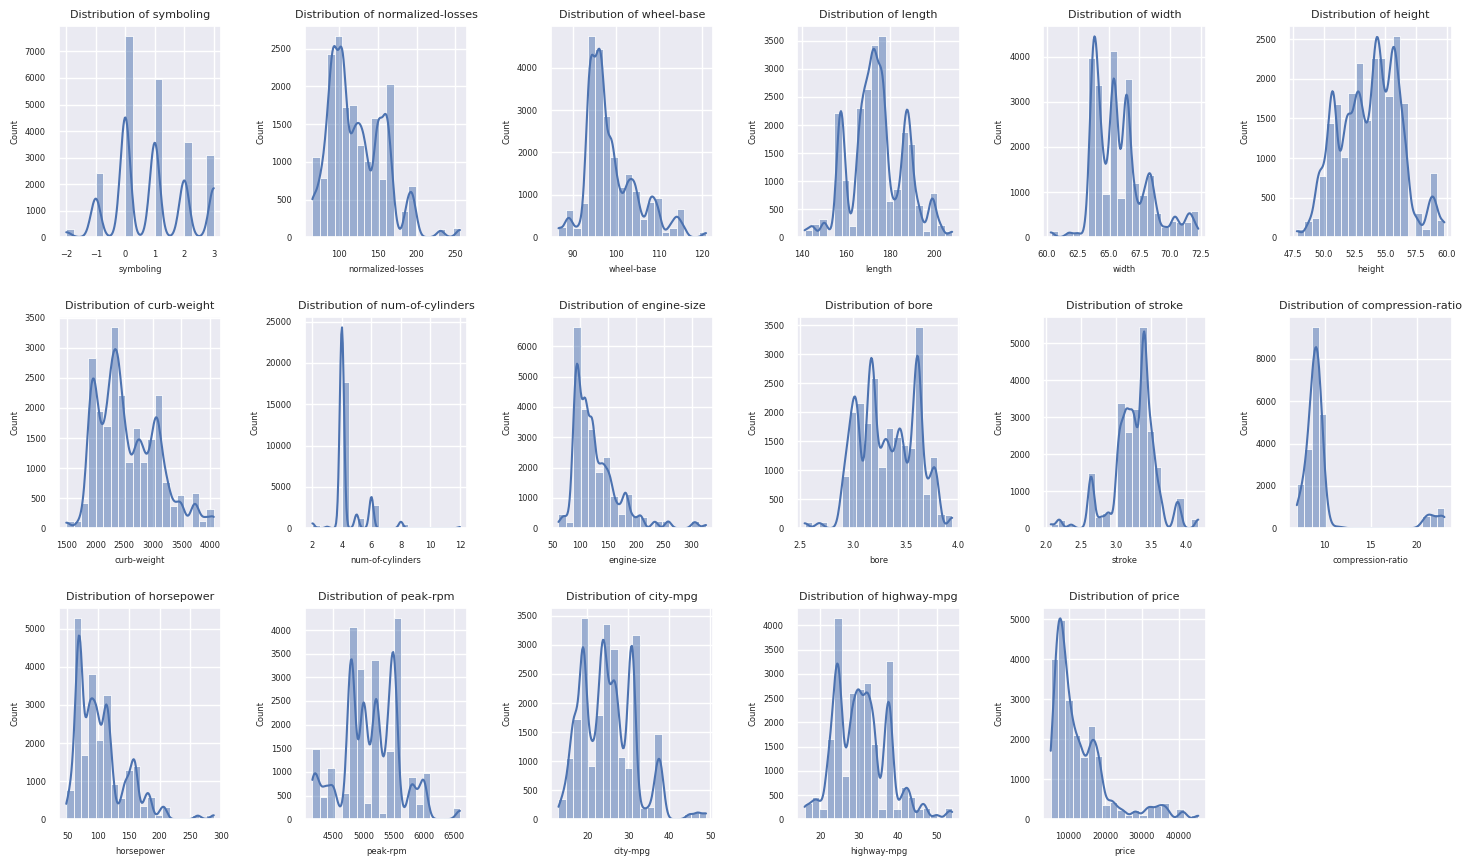

In [89]:
# Select columns to plot
numerical_features = df.select_dtypes(include=np.number).columns

# Setup dynamic layout
n_features = len(numerical_features)
n_cols = 6  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate plots
for idx, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature}", fontsize=8)
    axes[idx].set_xlabel(feature, fontsize=6)
    axes[idx].set_ylabel("Count", fontsize=6)
    axes[idx].tick_params(axis='both', which='major', labelsize=6)

# Remove extra subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])  # Delete unused axes

# Adjust layout and display
plt.tight_layout()
plt.show()




*   Most cars had symboling rating of 0 and 1
*   Very few number of cars had the symboling rating of -2.



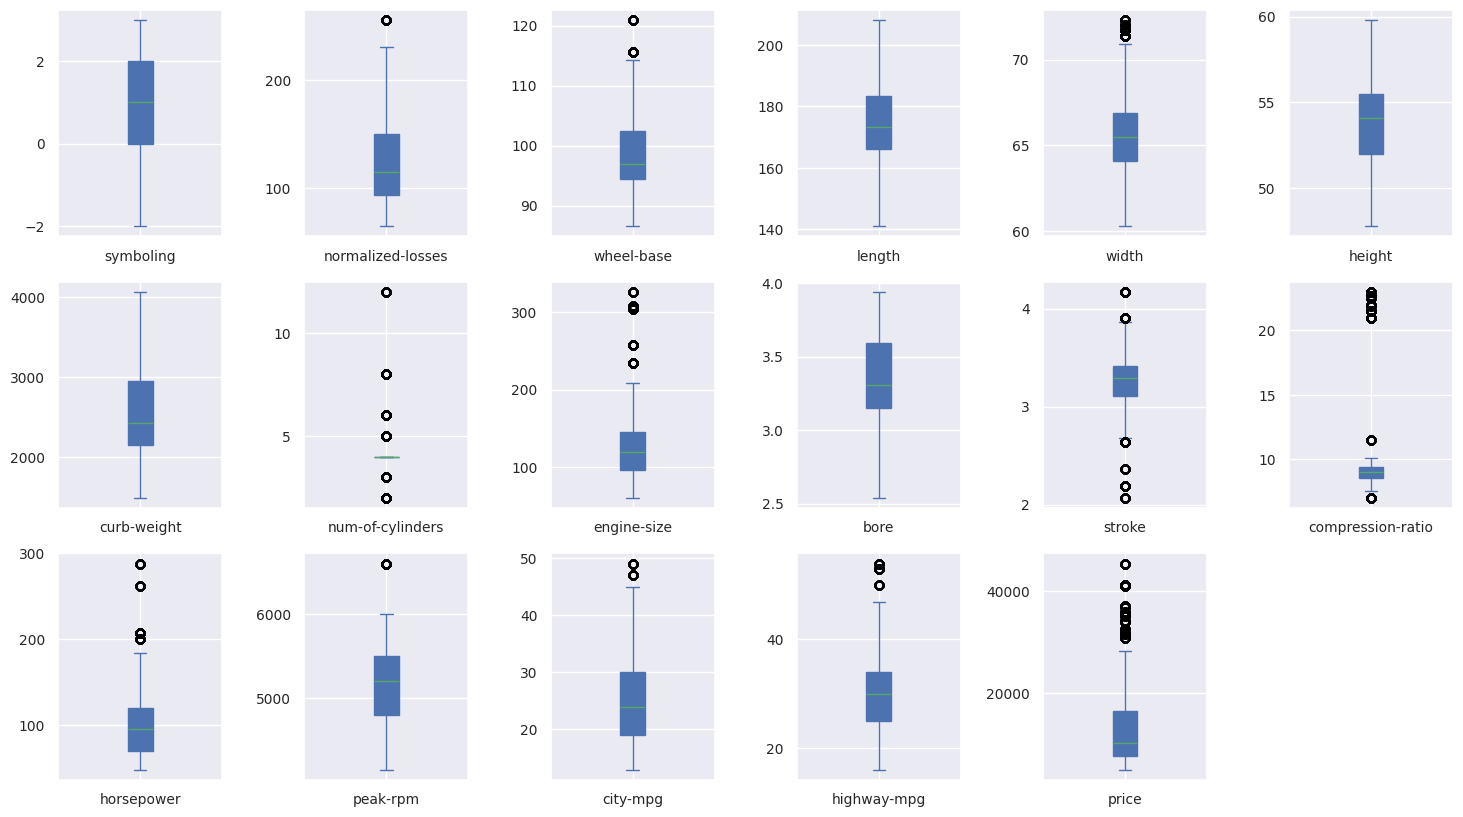

In [90]:
# Boxplot to view the spread

# Select columns to plot
df_to_plot = df.select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(3,6), kind='box', figsize=(18,10), fontsize=10, patch_artist=True)
plt.subplots_adjust(wspace=0.5);

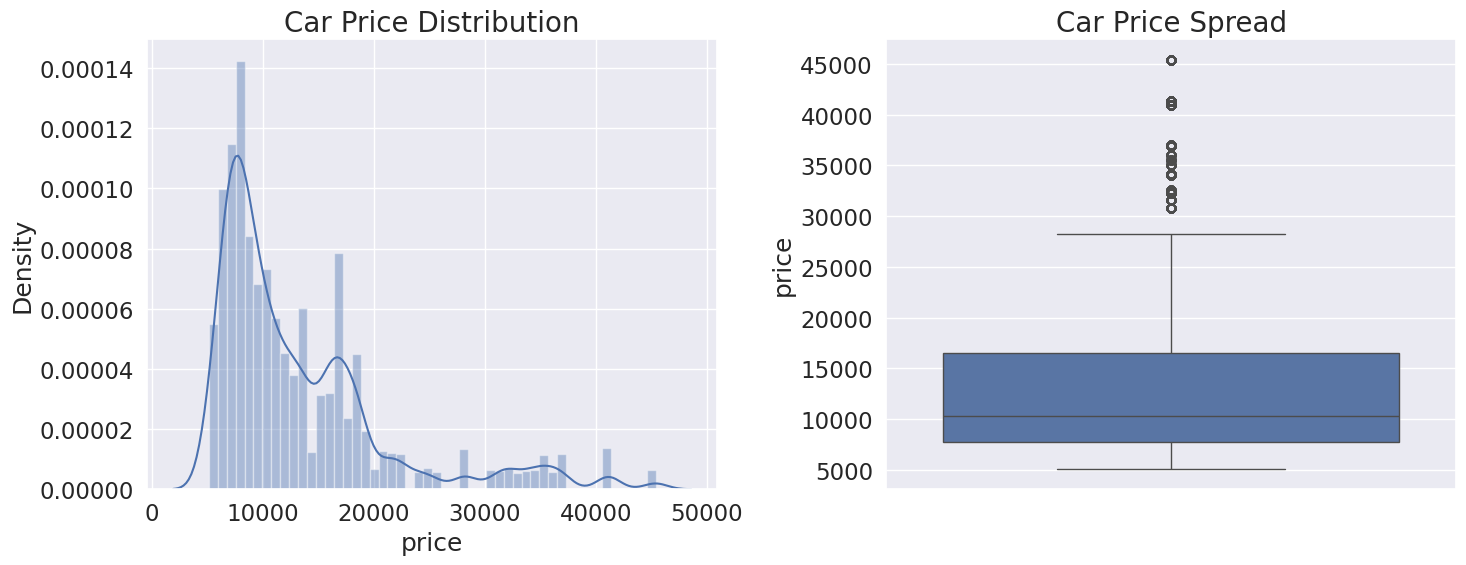

In [91]:
# Target feature distribution

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],kde=True)
plt.title("Car Price Distribution",fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"])
plt.title("Car Price Spread",fontsize=20)
plt.tight_layout()
plt.show()

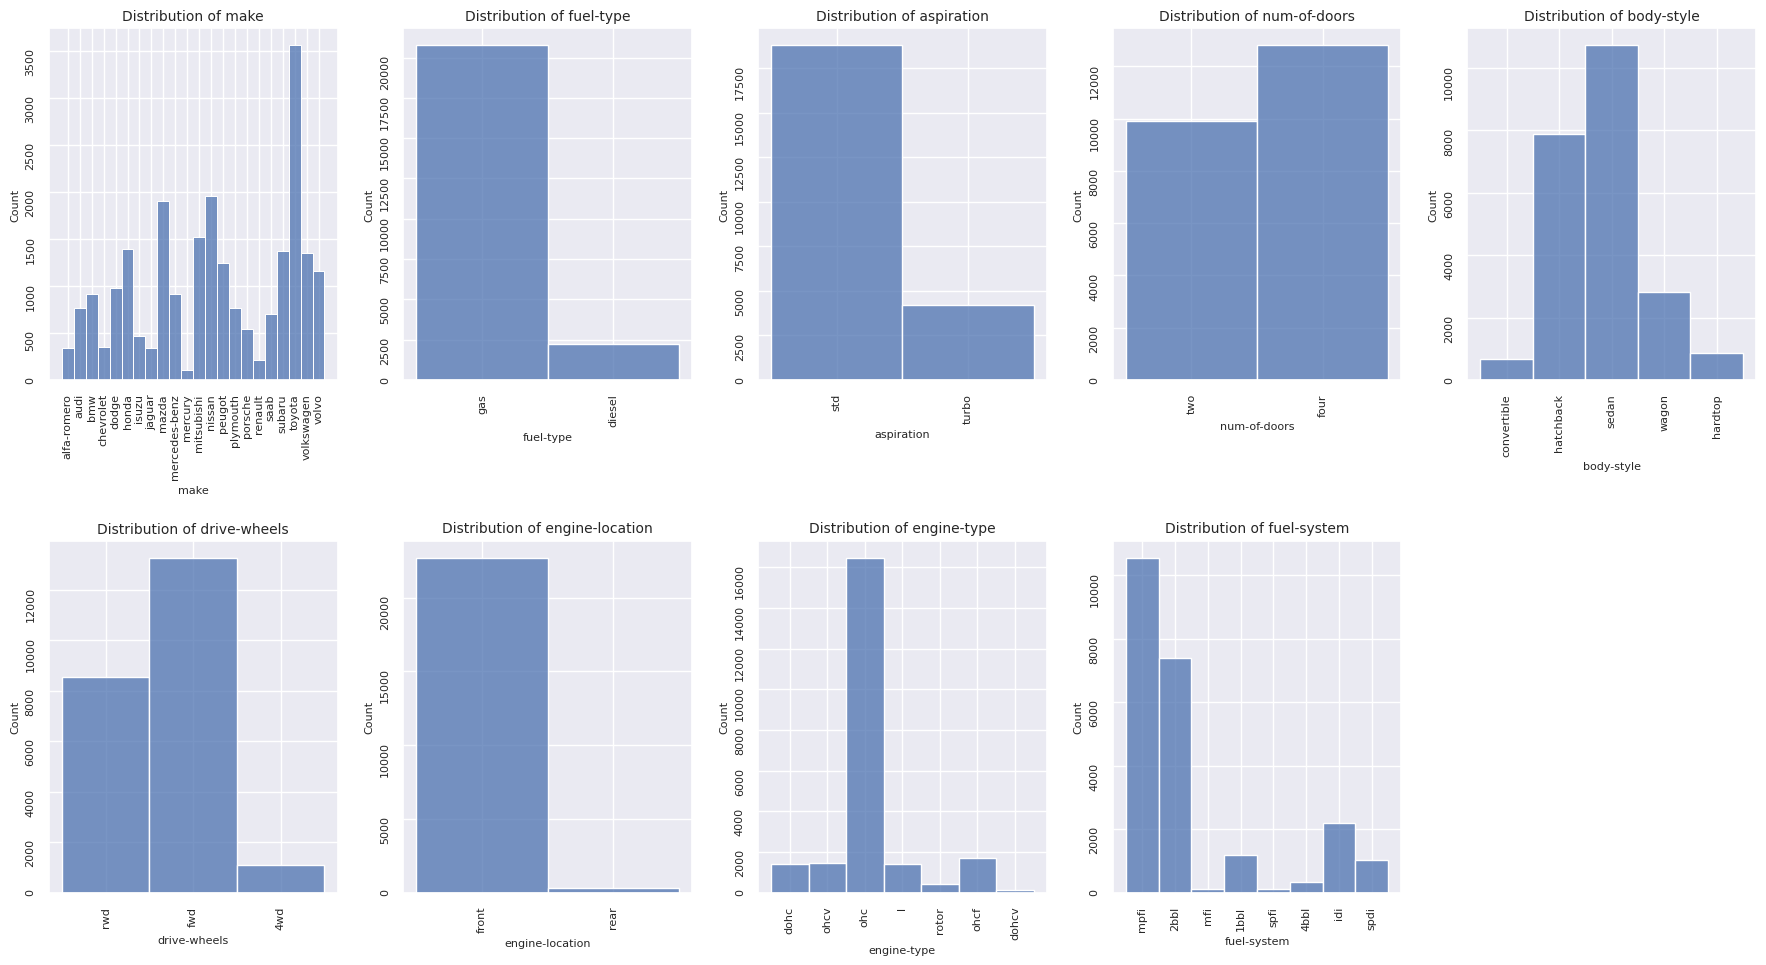

In [92]:
## Distribution of Categorical features

# Select columns to plot
categorical_features = df.select_dtypes(exclude=np.number).columns

# Setup dynamic layout
n_features = len(categorical_features)
n_cols = 5  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate plots
for idx, feature in enumerate(categorical_features):
    sns.histplot(df[feature], kde=False, bins=20, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature}", fontsize=10)
    axes[idx].set_xlabel(feature, fontsize=8)
    axes[idx].set_ylabel("Count", fontsize=8)
    axes[idx].tick_params(axis='both', which='major', labelsize=8, rotation=90)

# Remove extra subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])  # Delete unused axes

# Adjust layout and display
plt.tight_layout()
plt.show()


**Univariate Analysis Observations:**

Categorical Features:

1. Make

  *   A wide range of car makes is represented, with certain brands like Toyota, Nissan, and Mazda dominating the dataset.
  *   Luxury car brands like Porsche, Mercedes-Benz and BMW also have significant counts, which may correlate with higher prices.

2. Fuel Type

  *   The majority of cars use gas, with a smaller proportion running on diesel.

3. Aspiration

  *   Most cars have standard aspiration, while turbocharged engines make up a smaller proportion.
  *   Turbocharged cars may correspond to higher prices.

4. Num. of Doors

  *   Most cars have 'four' doors

4. Body Style

  *   Sedans dominate the dataset, followed by hatchbacks and wagons.
  *   Convertibles and hardtops are rare and might correspond to niche markets with specific price trends.

5. Drive Wheels

  *   Front-wheel drive (fwd) is the most common, followed by rear-wheel drive (rwd), with four-wheel drive (4wd) being the least frequent.
  *   Drive type can influence price

6. Engine Location

  *   The majority of cars have engines located in the front, with very few rear-engine cars.

7. Engine Type

  *   The dataset is dominated by ohc engines, while other types are less frequent.
  *   Engine type might influence price due to differences in performance and manufacturing costs.
  
8. Fuel System

  *   Most cars use mpfi, and 2bbl systems, with other systems being less frequent.
  *   Fuel system type may indicate technological sophistication and influence price.


Numerical Features:

1. Features Without Outliers

  *   Symboling, Length, Height, Curb-Weight, Bore.
  *   These features are well-behaved, stable, and represent dimensions or safety-related attributes.
  *   Symboling, in particular, captures the insurance risk rating of the car, which could indirectly influence price by reflecting perceived safety.

2. Features With Outliers

  *   Wheel-Base, Width, Normalized-Losses, Num-of-Cylinders, Engine-Size, Stroke, Compression-Ratio, Horsepower, Peak-RPM, City-MPG, Highway-MPG, Price.
  *   Normalized-Losses reflects average loss payments per insured vehicle and shows significant variability, likely driven by expensive or high-risk models.
  *   Other features with outliers mainly relate to performance, engine specifications, or fuel efficiency, contributing to the variability in pricing, especially for premium vehicles.

3. Target Feature: Price

  *   Price is heavily right-skewed, with most cars priced below $20,000. Significant outliers represent luxury or high-performance vehicles.
  *   The pricing of cars is influenced by a mix of dimensional features (e.g., curb weight, length) and performance-related features (e.g., horsepower, engine size). Outliers heavily impact predictions, corresponding to niche or premium models.

#### 3.2. Bivariate Analysis

We compare the distribution of categorical features against price to investigate each feature's distribution with respect to price.

For numerical features we create a heatmap of correlation matrix

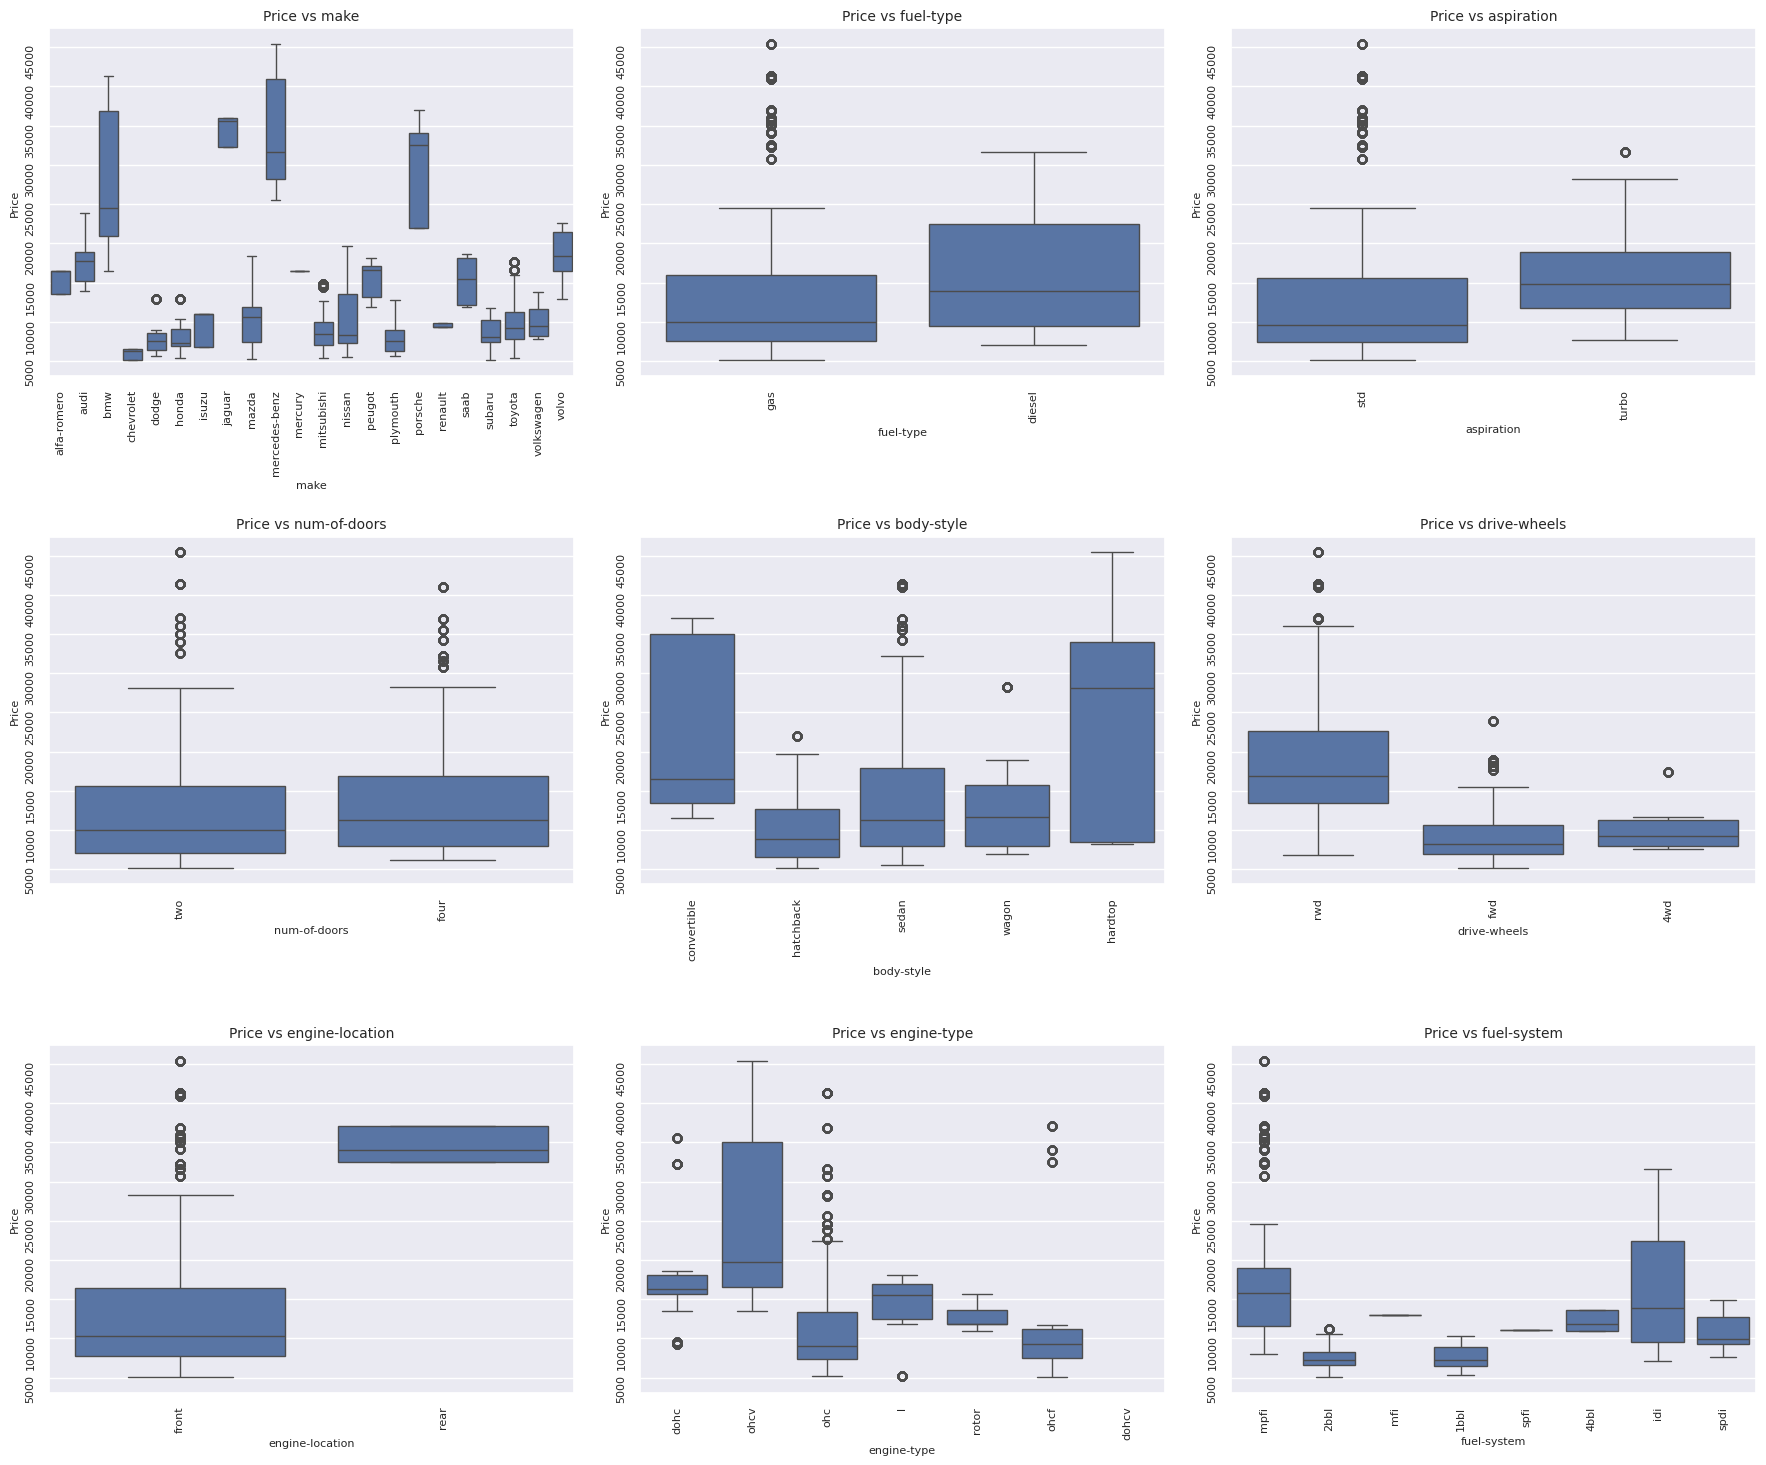

In [93]:
# Select categorical columns to plot
categorical_features = df.select_dtypes(exclude=np.number).columns

# Setup dynamic layout
n_features = len(categorical_features)
n_cols = 3  # Number of columns in the grid
n_rows = 3  # Required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate plots
for idx, feature in enumerate(categorical_features):
    sns.boxplot(x=df[feature], y=df['price'], ax=axes[idx])
    axes[idx].set_title(f"Price vs {feature}", fontsize=10)
    axes[idx].set_xlabel(feature, fontsize=8)
    axes[idx].set_ylabel("Price", fontsize=8)
    axes[idx].tick_params(axis='both', which='major', labelsize=8, rotation=90)

# Remove extra subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])  # Delete unused axes

# Adjust layout and display
plt.tight_layout()
plt.show()


1. Make

  *   Mercedes, BMW, Jaguar, and Porsche exhibit the highest prices, representing luxury brands.
  *   Volvo, Audi, and Alfa-Romeo fall in the mid-price range, suggesting semi-luxury offerings.
  *   The remaining brands are economy-focused, reflected in their lower median prices.

2. Fuel Type

  *   The majority of cars use gas, with a smaller proportion running on diesel.
  *   Gas-powered cars dominate the economy segment with lower median prices.

3. Aspiration

  *   Turbocharged cars have a higher median price, consistent with their enhanced performance features.
  *   Standard aspiration cars include a significant number of high-value outliers, indicating that some high-end models use standard aspiration.

4. Num. of Doors

  *   Both two-door and four-door cars have similar price distributions.
  *   Four-door cars have a slightly higher price range, with outliers in both categories representing sports or luxury models.


5. Body Style

  *   Hardtops have the highest median price and the largest price range, followed by convertibles.
  *   Hatchbacks are the cheapest.
  *   Sedans have numerous outliers, indicating that some high-value cars feature a sedan body style.

6. Drive Wheels

  *   rwd (rear-wheel drive) cars exhibit the highest median prices, along with numerous high-value outliers.
  *   4wd (four-wheel drive) cars have a slightly higher median price than fwd (front-wheel drive), but their price ranges are similar.
  *   fwd cars are the cheapest, although they also include some high-price outliers.

7. Engine Location

  *   Rear-engine cars are significantly more expensive, with the highest median prices.
  *   Front-engine cars dominate the dataset but are generally cheaper, with some high-value outliers representing luxury or sports models.

8. Engine Type

  *   ohcv has the highest median price and the broadest price range, indicating its prevalence in high-performance cars.
  *   dohc is the second most expensive, followed by type l.
  *   ohc engines dominate the cheaper segment but also include the most outliers, reflecting their widespread use across price tiers.
  
9. Fuel System

  *   mpfi (multi-point fuel injection) has the highest median price, reflecting its dominance in performance and mid-to-high-priced cars.
  *   idi has the second-highest median price and the largest price range, indicating its usage in diverse car categories.
  *   2bbl and 1bbl systems have the lowest median prices, representing older or less sophisticated technology typically found in economy cars.

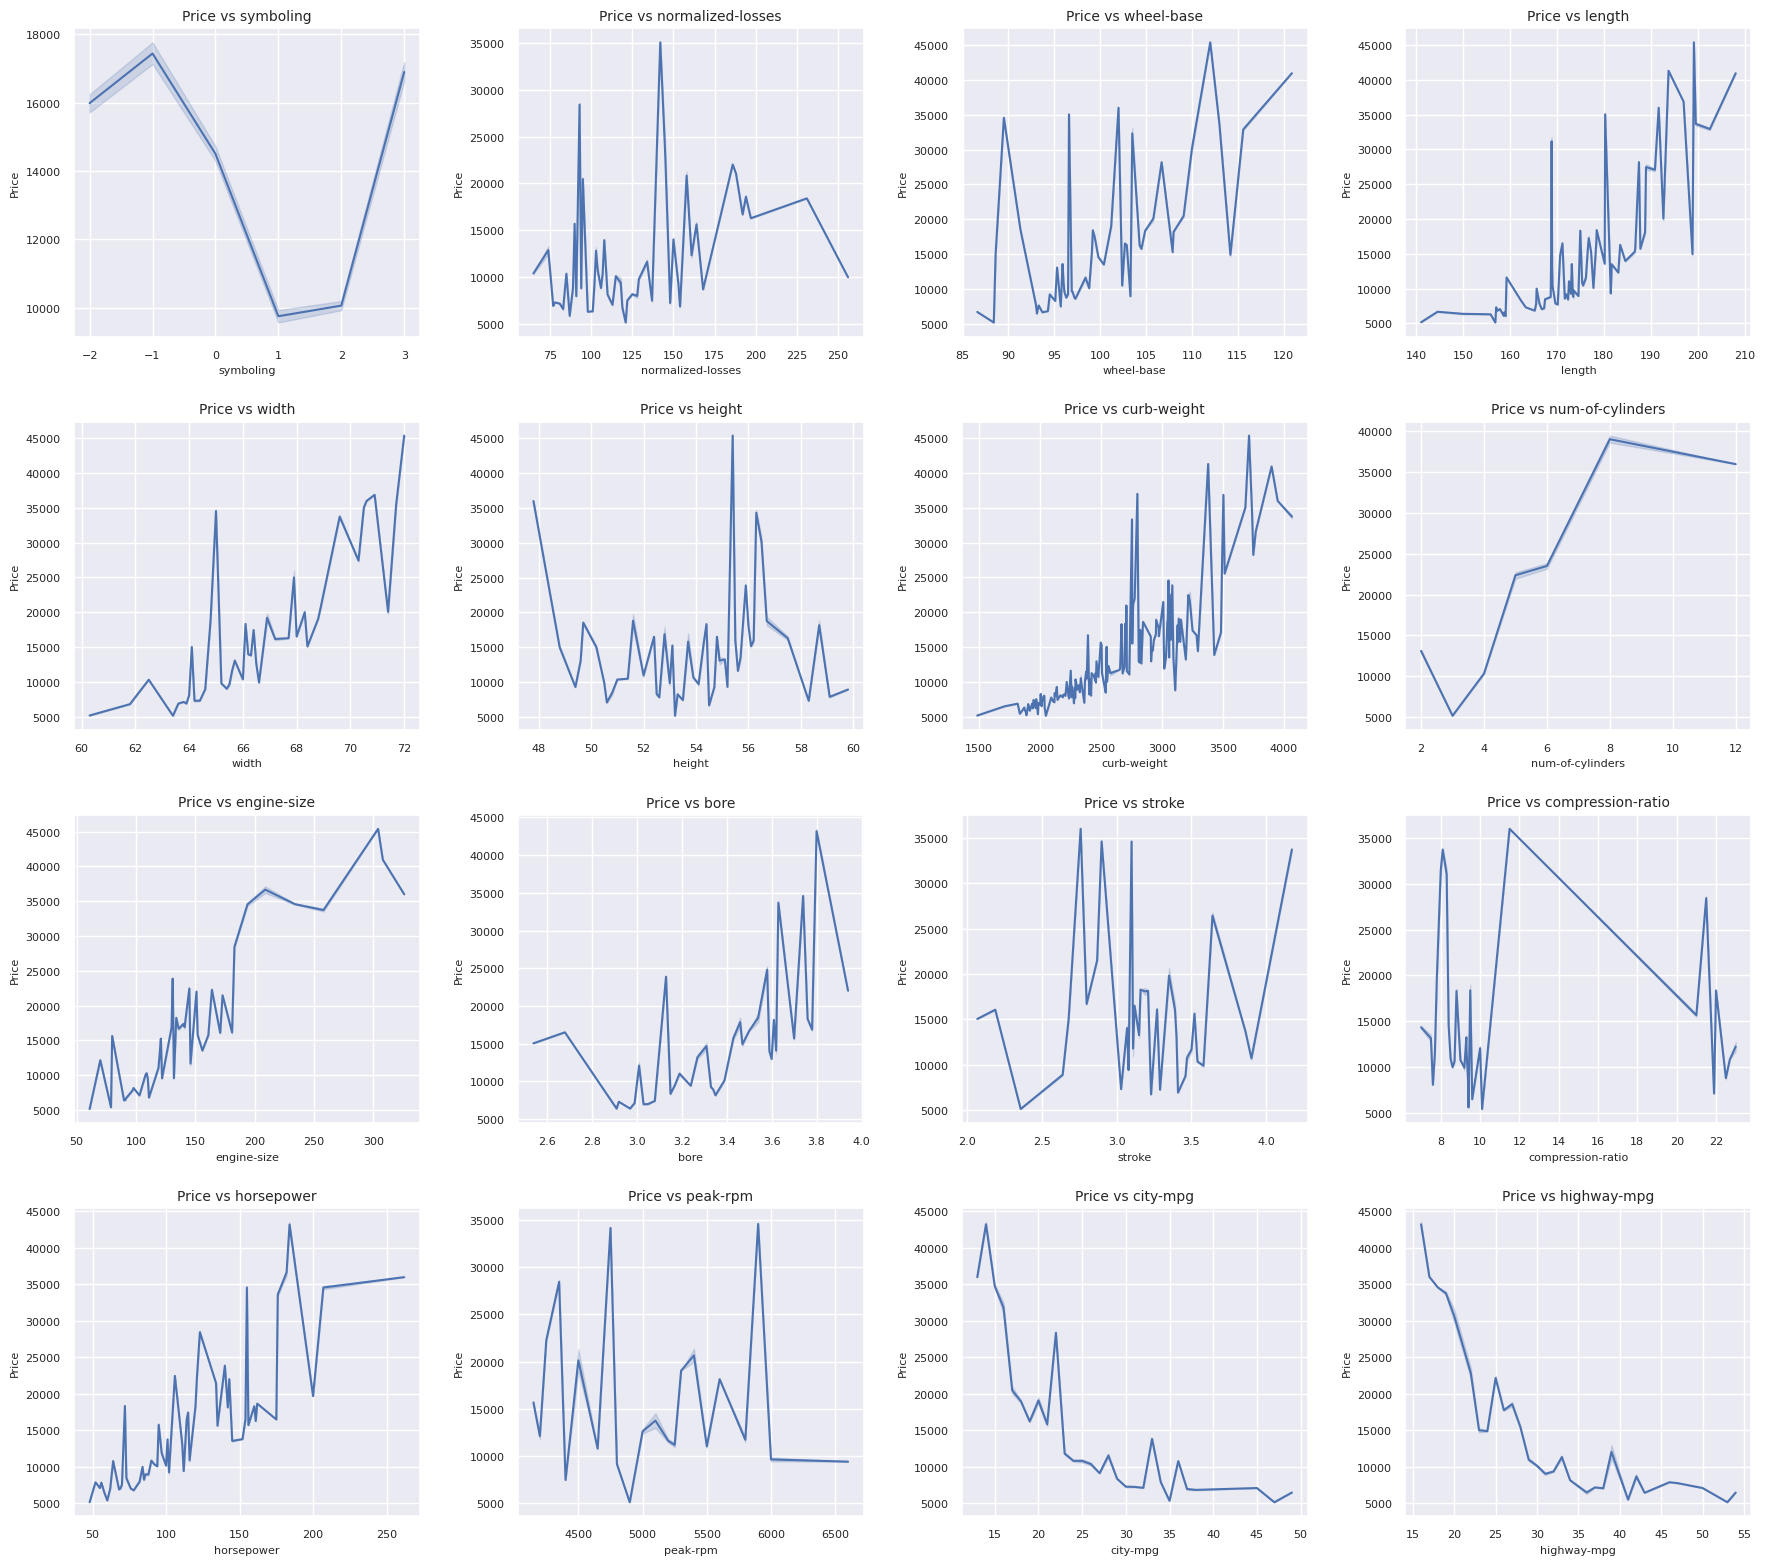

In [94]:
# Select numerical features excluding 'price'
numerical_features = df.select_dtypes(include=np.number).columns
numerical_features = numerical_features.drop('price')  # Exclude 'price'

# Setup dynamic layout
n_features = len(numerical_features)
n_cols = 4  # Number of columns in the grid
n_rows = 4  # Number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate line graphs for each numerical feature against price
for idx, feature in enumerate(numerical_features):
    # Sort values to create a smooth trend
    sorted_df = df.sort_values(by=feature)

    # Plot the line graph
    sns.lineplot(x=sorted_df[feature], y=sorted_df['price'], ax=axes[idx])
    axes[idx].set_title(f"Price vs {feature}", fontsize=10)
    axes[idx].set_xlabel(feature, fontsize=8)
    axes[idx].set_ylabel("Price", fontsize=8)
    axes[idx].tick_params(axis='both', labelsize=8)

# Remove extra subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])  # Delete unused axes

# Adjust layout and display
plt.tight_layout()
plt.show()


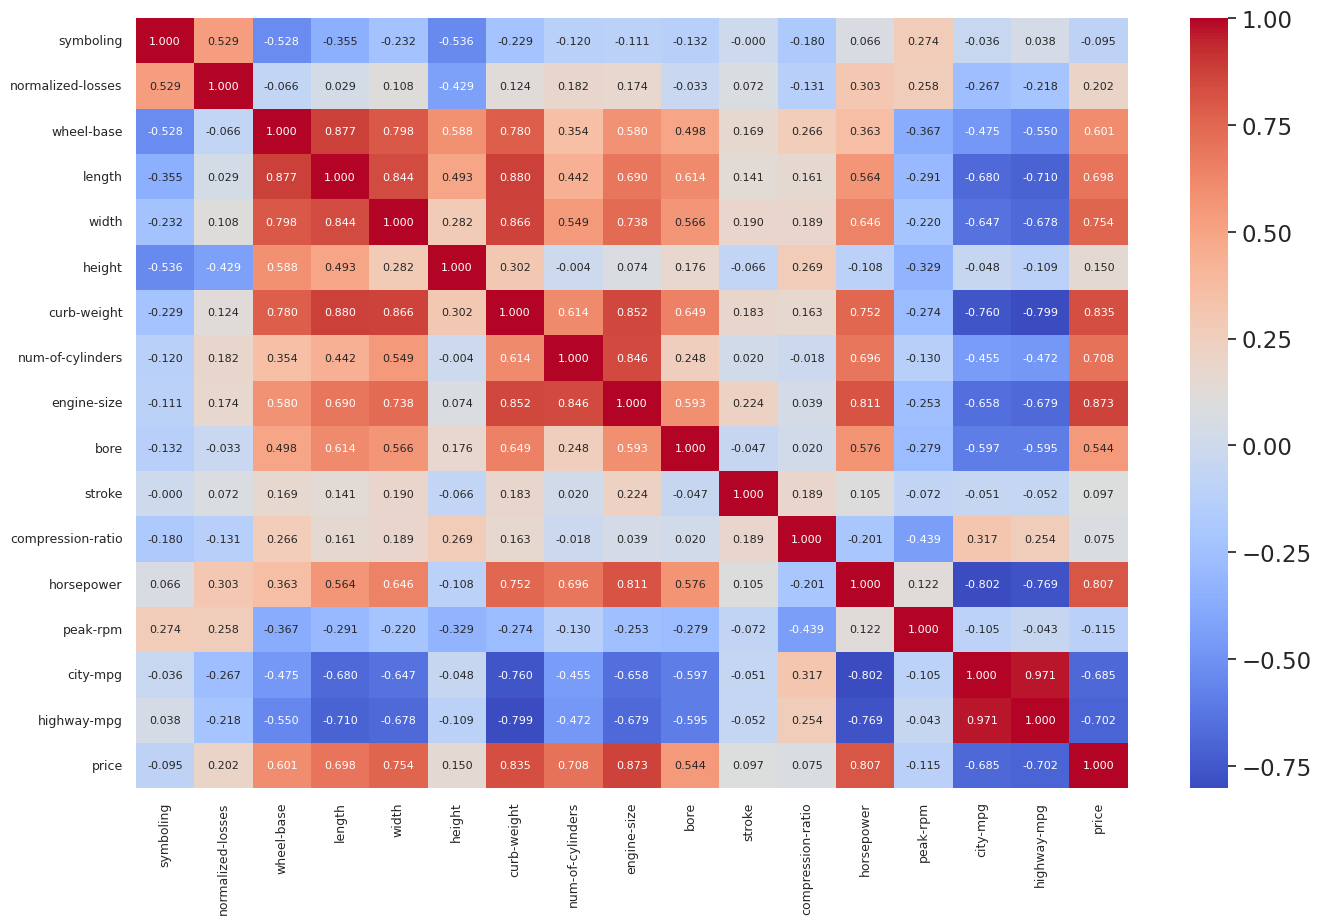

In [95]:
# Heatmap of all numerical features
plt.figure(figsize = (16,10))
ax = sns.heatmap(df.corr(numeric_only=True), annot = True ,cmap = 'coolwarm', fmt='.3f', annot_kws={'size': 8})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
plt.show()

Key Insights:

* Symboling risk indicator of -1, -2, and 3 had the highest prices.

* Features like engine-size (0.873), curb-weight(0.835), horsepower(0.807), width(0.754), num-of-cylinders(0.708), and length(0.698) are the most significant predictors of price with a positive relationship, indicating their strong relationships with luxury and performance.

* Features like city-mpg(-0.685) and highway-mpg(-0.702) have a strong inverse relationship with price, emphasizing the trade-off between efficiency and cost.

* Features like bore(0.544), and wheel-base(0.601) exhibit moderate positive relationships with price, reflecting their contribution to performance, stability, and size in influencing car costs.

* Other features such as normalized-losses(0.202), symboling(-0.095), height(0.150), stroke(0.097), peak-rpm(-0.115) and compression-ratio(0.075) show weak correlations, likely contributing less to price prediction.

### 4. Data Preprocessing pipelines

In [96]:
# Count null values in each column
null_counts = df.isnull().sum()

# Display columns with null counts
print(null_counts)

symboling            2913
normalized-losses    7581
make                 2969
fuel-type            2892
aspiration           2843
num-of-doors         3123
body-style           2875
drive-wheels         2990
engine-location      2850
wheel-base           2944
length               2953
width                2820
height               2940
curb-weight          2897
engine-type          2912
num-of-cylinders     2921
engine-size          2930
fuel-system          2944
bore                 3282
stroke               3252
compression-ratio    2867
horsepower           3246
peak-rpm             3083
city-mpg             2958
highway-mpg          2902
price                3395
dtype: int64


Both the categorical and numerical features have missing data.

*   Mode imputation for categorical data
*   Median imputation for numerical data due to data skewedness and outliers.



#### 4.1. Separate target variable

In [97]:
## Separate the features and target variable

target_variable = 'price'

input_data_X = df.drop(columns=[target_variable])
target_Y = df[target_variable]

In [98]:
# Verifying the shape of features and target
input_data_X.shape, target_Y.shape

((25874, 25), (25874,))

#### 4.2. Feature engineering

*   Mode imputation for categorical data
*   Onehot encoding for categoring features


*   Median imputation for numerical data
*   Standard scaling for numerical features




In [99]:
numerical_features = input_data_X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = input_data_X.select_dtypes(include=['object']).columns.tolist()


# Creating the numerical pipeline with median imputation and scaling
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Median imputation
    ('scaler', StandardScaler())  # Standard scaling
])

# Creating the categorical pipeline with mode imputation and one-hot encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mode imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine pipelines into a ColumnTransformer
final_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),  # Numerical pipeline
    ('cat', categorical_pipeline, categorical_features)  # Categorical pipeline
])

final_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['symboling', 'normalized-losses',
                                  'wheel-base', 'length', 'width', 'height',
                                  'curb-weight', 'num-of-cylinders',
                                  'engine-size', 'bore', 'stroke',
                                  'compression-ratio', 'horsepower', 'peak-rpm',
                                  'city-mpg', 'highway-mpg']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['make', 'fuel-type', 'aspiration',
                                  'num-of-doors', 'body-style', 'drive-wheels',
                                  'engine-location', 'engine-type',
                                  'fuel-system'])])

In [100]:
# Fit and transform the data
training_data_preprocessed = final_pipeline.fit_transform(input_data_X)

In [101]:
# Get the column names after preprocessing
categorical_features_names = final_pipeline.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(categorical_features_names)

training_data_preprocessed_df = pd.DataFrame(training_data_preprocessed, columns=all_feature_names)

# Display the first 5 rows
training_data_preprocessed_df.head()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.8241,-0.1742,-1.7496,-0.4509,-0.8731,0.1416,0.0070,-0.3363,-0.1646,0.5588,-1.9643,-0.2672,0.2009,0.1520,-0.6519,-0.5581,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,1.8241,-0.1742,-1.7496,-0.4509,-0.8731,-2.1664,0.0070,-0.3363,0.0889,0.5588,-1.9643,-0.2672,0.2009,0.1520,-0.6519,-0.5581,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.1191,-0.1742,-0.7180,-0.2451,-0.1842,-0.5987,0.5643,1.6128,0.6466,-0.0696,0.7038,-0.2672,1.3536,0.1520,-0.9765,-0.7122,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.9716,1.4578,0.2088,0.2180,0.1603,0.2287,-0.4205,-0.3363,-0.4435,-0.5409,0.0959,0.0006,-0.0403,0.8190,-0.1651,-0.0958,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.9716,1.4578,0.1388,-0.0736,-0.1842,0.2287,0.5663,0.6382,0.2410,-0.0696,0.4674,-0.5350,0.3082,0.8190,-1.1387,-1.3286,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [102]:
assert len(training_data_preprocessed_df) == len(target_Y), "Mismatch in row counts!"


In [103]:
# Add the target variable back to the preprocessed DataFrame
training_data_preprocessed_df[target_variable] = target_Y.values

# Drop rows where the target column has NaN values
training_data_cleaned = training_data_preprocessed_df.dropna(subset=[target_variable])

# Display the first 5 rows
training_data_cleaned.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price
0,1.8241,-0.1742,-1.7496,-0.4509,-0.8731,0.1416,0.0070,-0.3363,-0.1646,0.5588,-1.9643,-0.2672,0.2009,0.1520,-0.6519,-0.5581,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,13495.0000
1,1.8241,-0.1742,-1.7496,-0.4509,-0.8731,-2.1664,0.0070,-0.3363,0.0889,0.5588,-1.9643,-0.2672,0.2009,0.1520,-0.6519,-0.5581,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,16500.0000
2,0.1191,-0.1742,-0.7180,-0.2451,-0.1842,-0.5987,0.5643,1.6128,0.6466,-0.0696,0.7038,-0.2672,1.3536,0.1520,-0.9765,-0.7122,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,16500.0000
3,0.9716,1.4578,0.2088,0.2180,0.1603,0.2287,-0.4205,-0.3363,-0.4435,-0.5409,0.0959,0.0006,-0.0403,0.8190,-0.1651,-0.0958,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,13950.0000
4,0.9716,1.4578,0.1388,-0.0736,-0.1842,0.2287,0.5663,0.6382,0.2410,-0.0696,0.4674,-0.5350,0.3082,0.8190,-1.1387,-1.3286,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,17450.0000


#### 4.3. Train and Test Split

In [104]:
# Split into features (X) and target (y)
X = training_data_cleaned.drop(columns=[target_variable])
y = training_data_cleaned[target_variable]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17983, 69), (4496, 69), (17983,), (4496,))

### 5. Machine Learning Techniques

Train model using the following Machine Learning Algorithms:
- Multiple Linear Regressor
- Decision Tree Regressor
- KNN Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

#### 5.1. Multiple Linear Repgression

In [105]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # coefficents, intercept

# Predict on the test set
y_pred_lr = lr_model.predict(X_test) # targets are not provided w0x0+w1x1+w2x2 + b = price

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression\nMSE: {mse_lr}\nR2: {r2_lr}")

Linear Regression
MSE: 5274925.726715884
R2: 0.9163575463499262


In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

#### 5.2. Decision Tree Regressor

In [107]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree\nMSE: {mse_dt}\nR2: {r2_dt}")

Decision Tree
MSE: 925693.0329938369
R2: 0.9853216442054837


#### 5.3. KNN Regressor

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

para = {
    'n_neighbors': [3, 5, 7, 9, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
 # Total 8 combinations of KNNRegressor

In [109]:
car_reg=GridSearchCV(KNeighborsRegressor(),para,cv=10)

car_reg.fit(X_train,y_train)

car_reg.best_score_

0.9941252938343663

In [110]:
car_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [111]:
# Initialize and train the KNN Regressor
KNN_reg = KNeighborsRegressor(n_neighbors=12, weights='uniform')
KNN_reg.fit(X_train,y_train)

# Predict on the test set
y_pred_knn =KNN_reg.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNearestNeighbour\nMSE: {mse_knn}\nR2: {r2_knn}")

KNearestNeighbour
MSE: 636298.0047449584
R2: 0.9899104690517321


#### 5.4. Random Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest\nMSE: {mse_rf}\nR2: {r2_rf}")

Random Forest
MSE: 477629.07253053633
R2: 0.9924264208387374


#### 5.5. Gradient Boosting Regressor

In [113]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting\nMSE: {mse_gb}\nR2: {r2_gb}")

Gradient Boosting
MSE: 1316359.7686660583
R2: 0.9791269931290536


#### 5.6. Model Comparison

In [114]:
model_comparison = pd.DataFrame({'Model Name': ['Multiple Linear', 'Descision Tree', 'KNN Regressor', 'Random Forest', 'Gradient Boosting'],
                                 'MSE': [mse_lr, mse_dt, mse_knn, mse_rf, mse_gb],
                                 'R2': [r2_lr, r2_dt, r2_knn, r2_rf, r2_gb]})

In [115]:
print(model_comparison)

          Model Name          MSE     R2
0    Multiple Linear 5274925.7267 0.9164
1     Descision Tree  925693.0330 0.9853
2      KNN Regressor  636298.0047 0.9899
3      Random Forest  477629.0725 0.9924
4  Gradient Boosting 1316359.7687 0.9791


In [116]:
# Limit the decimal places for cleaner visual

#pd.options.display.float_format = '{:.4f}'.format
#print(model_comparison)


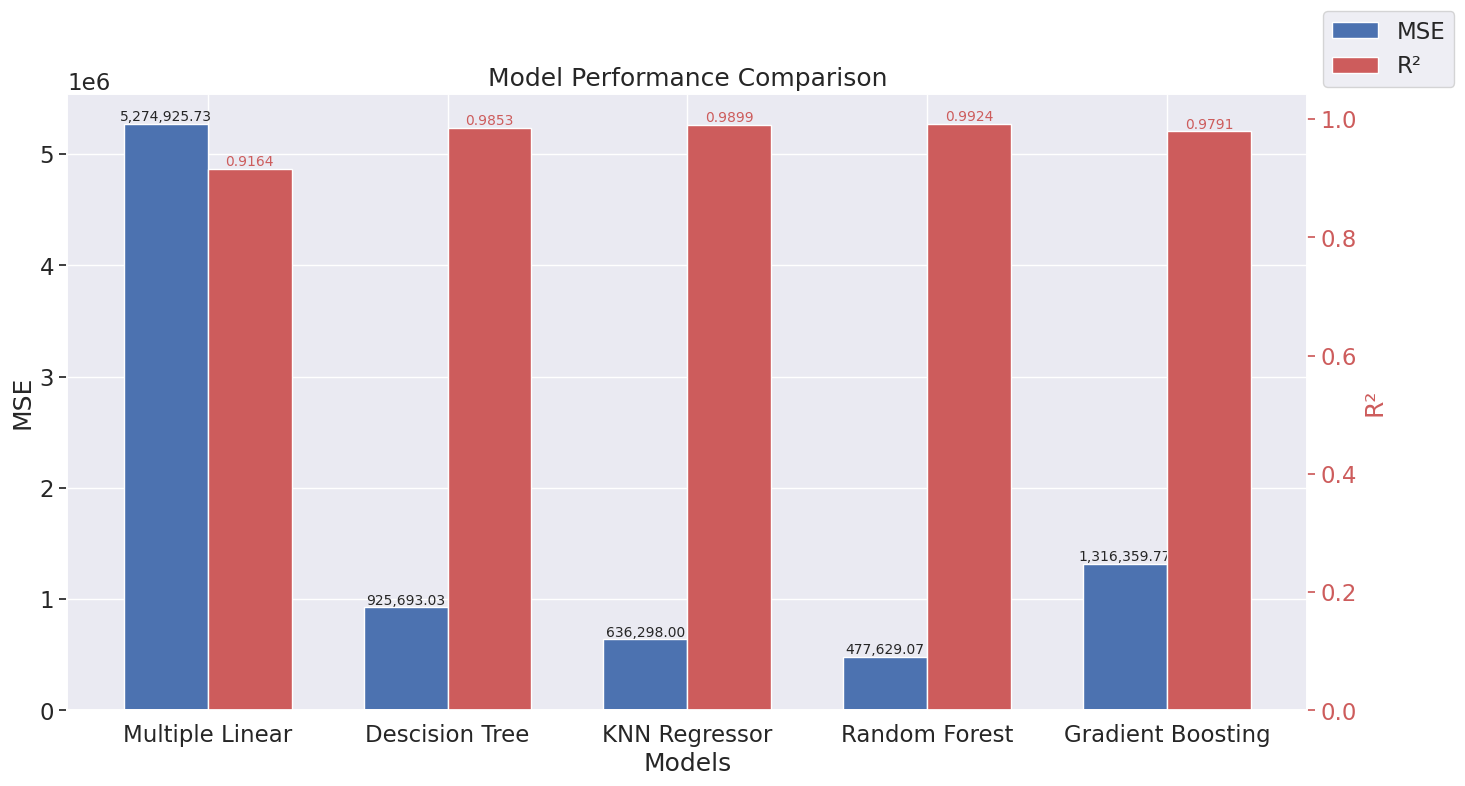

In [123]:
# Extracting data
models = model_comparison['Model Name']
mse_values = model_comparison['MSE']
r2_values = model_comparison['R2']

# Define bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot MSE bars on primary y-axis
bars_mse = ax1.bar(x - bar_width/2, mse_values, width=bar_width, label='MSE')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='y')

# Create secondary axis for R²
ax2 = ax1.twinx()
bars_r2 = ax2.bar(x + bar_width/2, r2_values, width=bar_width, label='R²', color='#CD5C5C')
ax2.set_ylabel('R²', color='#CD5C5C')
ax2.tick_params(axis='y', colors='#CD5C5C')

# Set x-axis labels
ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Add annotations for MSE
for bar in bars_mse:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.2f}',
             ha='center', va='bottom', fontsize=10)

# Add annotations for R²
for bar in bars_r2:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}',
             ha='center', va='bottom', color='#CD5C5C', fontsize=10)

# Add legends
fig.legend(loc='upper right')

# Remove grid lines
plt.grid(False)

# Show the plot
plt.title('Model Performance Comparison')
plt.show()

### 6 Conclusion

Best Performing Model:

* The Random Forest model demonstrates the best performance, achieving the lowest
MSE (477,629.07) and the highest R² value (0.9924). This indicates that the model provides the most accurate predictions with minimal error and explains the highest proportion of variance in the data.


Second Best Model:

* The KNN Regressor follows as the second-best performer, with an MSE of 636,298.00 and an R² value of 0.9899. While it shows slightly higher error compared to Random Forest, it still maintains strong predictive capability.


Worst Performing Model:

* The Multiple Linear Regression model is the worst-performing model, exhibiting the highest MSE (5,274,925.73) and the lowest R² value (0.9164). This suggests that it struggles to capture the complexity of the data, leading to higher prediction errors and lower explanatory power.



Overall, the Random Forest model is the most suitable choice for this dataset, offering the best balance between accuracy and reliability. The KNN Regressor can serve as a viable alternative, whereas the Multiple Linear Regression model may require further tuning or additional features to enhance its predictive power.

---